In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [16]:
ccb = pd.read_csv('.././data/credit_card_balance.csv')
display(ccb.sample(8))
print(ccb.info())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1445761,1912838,149735,-73,109449.27,180000,0.0,0.0,0.0,0.0,9000.000,8842.500,8842.500,104241.645,109449.27,109449.27,0.0,0,0.0,0.0,3.0,Active,1,0
94150,2659085,161672,-1,112432.68,495000,117000.0,117000.0,0.0,0.0,4779.225,54215.325,54215.325,108418.905,111087.18,111087.18,1.0,1,0.0,0.0,10.0,Active,0,0
177169,1227531,275462,-13,0.00,135000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.00,0.00,0.0,0,0.0,0.0,47.0,Completed,0,0
3235662,1235537,360809,-28,0.00,450000,NaN,0.0,NaN,NaN,NaN,NaN,0.000,0.000,0.00,0.00,NaN,0,NaN,NaN,NaN,Active,0,0
2036161,1974932,427538,-7,0.00,765000,0.0,0.0,0.0,0.0,0.000,1378.350,1378.350,0.000,0.00,0.00,0.0,0,0.0,0.0,9.0,Active,0,0
1406130,1155874,254345,-5,0.00,45000,0.0,0.0,0.0,0.0,0.000,357.525,357.525,0.000,0.00,0.00,0.0,0,0.0,0.0,51.0,Active,0,0
1151955,2462403,320751,-9,41568.75,765000,0.0,0.0,0.0,0.0,2333.880,2700.000,387.135,40857.660,41568.75,41568.75,0.0,0,0.0,0.0,4.0,Active,0,0
2709451,1560545,309113,-10,0.00,135000,0.0,0.0,0.0,0.0,0.000,NaN,0.000,0.000,0.00,0.00,0.0,0,0.0,0.0,0.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [6]:
# function to plot missing value percentage
def plot_missing_percentage(df):
    """
    Plot the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    """
    # Calculate the percentage of missing values
    missing = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with the results
    percentage_missing = pd.DataFrame({'column': df.columns, 'missing_percentage %': missing.values})
    percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
    percentage_missing = percentage_missing.sort_values('missing_percentage %', ascending=False)
    percentage_missing = percentage_missing.reset_index()
    percentage_missing = percentage_missing.drop('index', axis=1)

    # Plot the results
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)
    plt.title('Missing values Percentage for Each Column', fontsize=17, fontweight='bold')
    plt.ylabel('Kolom', fontsize=12)
    plt.xlabel('missing_percentage %', fontsize=12)
    plt.tight_layout()
    plt.xlim(0, 100)
    plt.show()

    # function to drop columns with missing values
def dropna(df, threshold=0.3):
    '''
    Drop columns from a DataFrame where the proprortion of missing values is greater than specified threshold.

    Parameters:
    df: The DataFrame to process
    threshold: The threshold proportion of missing vales. Columns with a proportion of missing values greater than this will be dropped.

    Returns:
    Pandas.DataFrame: The processed DataFrame. 
    '''
    for column in df.columns:
        missing_proportion = df[column].isnull().sum() / len(df)
        if missing_proportion > threshold:
            df = df.drop(column, axis=1)
    return df

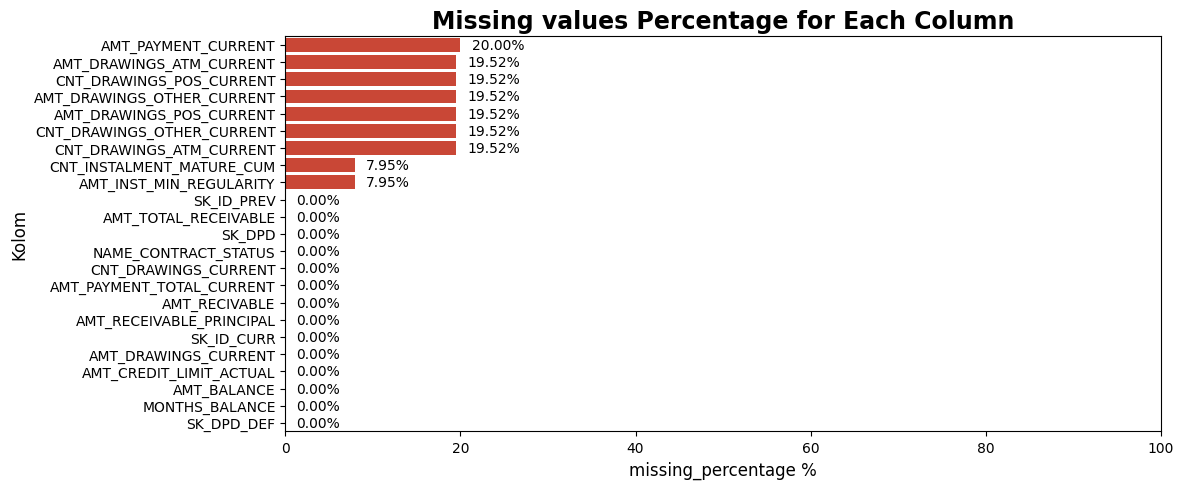

In [7]:
plot_missing_percentage(ccb)


IndexError: index 10 is out of bounds for axis 0 with size 10

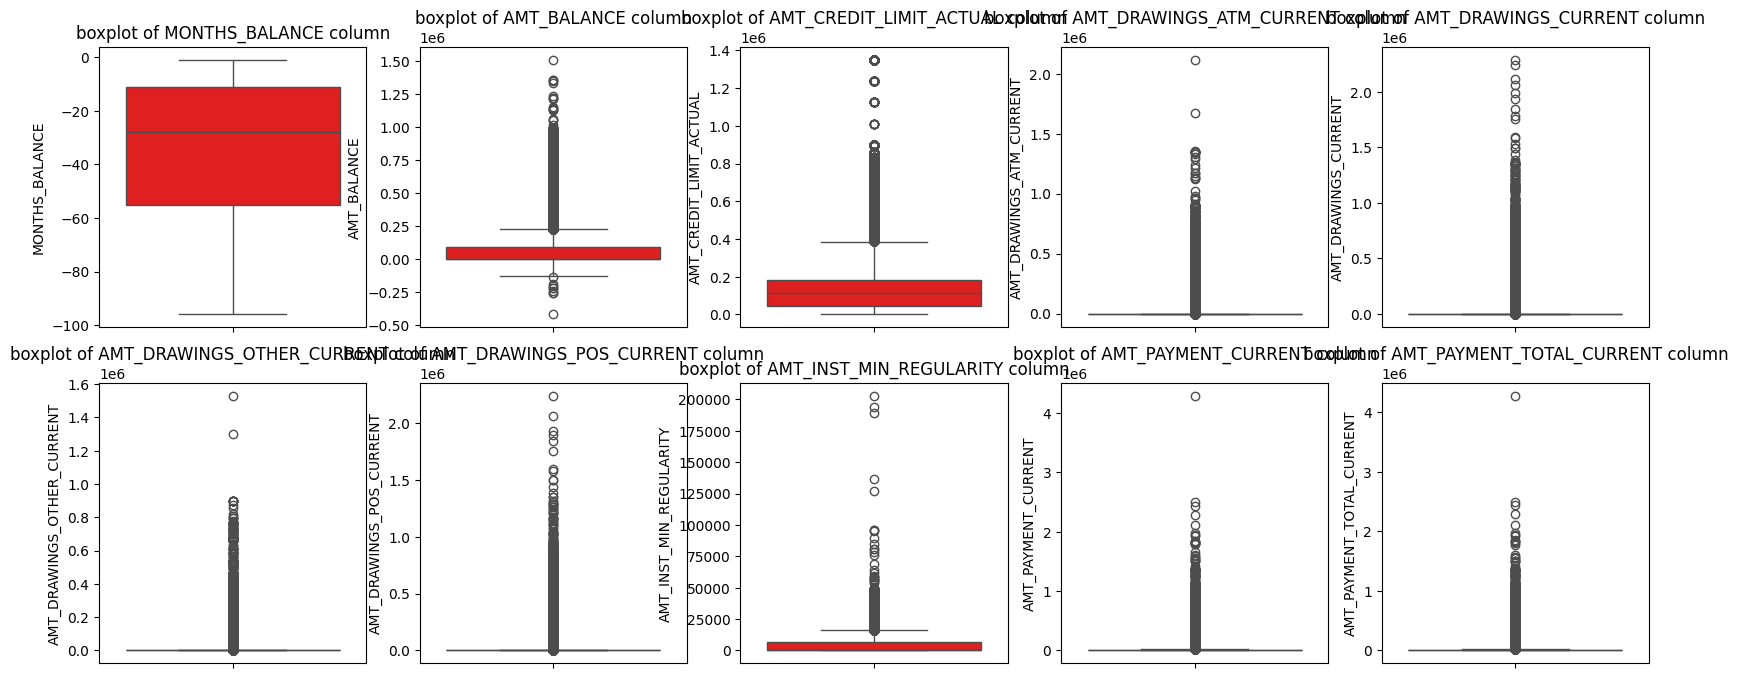

In [23]:
num = ccb.select_dtypes(include='number').drop(columns=['SK_ID_PREV', 'SK_ID_CURR'])

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = ax.flatten()
for i, col in enumerate(num.columns):
    sns.boxplot(y=col, data=num, ax=ax[i], color='red')
    ax[i].set_title(f'boxplot of {col} column')

plt.tight_layout()

In [20]:
num.shape

(3840312, 22)

In [14]:
ccb.fillna(0, inplace=True)